<a href="https://colab.research.google.com/github/lukeolson/imperial-multigrid/blob/master/lecture-1-mg-basics/5-interpolation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import scipy as sp
import scipy.sparse as sparse
import matplotlib.pyplot as plt
plt.style.use('seaborn-talk')
%matplotlib inline

In [3]:
def interpolate(vc):
    """
    linear interpolation
    
    vc : array of size 2**k - 1
    
    interpolate v of size 2**(m-1)-1 to 2**(m)-1
    """
    nc = len(vc)
    nf = 2**(int(np.log2(nc+1))+1)-1
    
    vf = np.zeros((nf,))
    
    # 1
    vf[2:-1:2] = 0.5 * vc[:-1] + 0.5 * vc[1:]
    
    # 2
    vf[1::2] = vc
    
    # 3
    vf[0] = 0.5 * vc[0]
    # 4
    vf[-1] = 0.5 * vc[-1]
    
    return vf

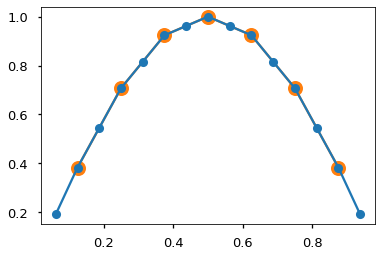

In [4]:
m = 4
nf = 2**m - 1
nc = 2**(m-1) - 1

xc = np.linspace(0,1,nc+2)[1:-1]
vc = np.sin(1 * np.pi * xc)
#vc = np.random.rand(nc)
plt.plot(xc, vc, 'o-', color='tab:orange', clip_on=False, ms=15)

xf = np.linspace(0,1,nf+2)[1:-1]
vf = interpolate(vc)
#vf[0::2] += 0.5 * np.random.randn(len(vf[::2]))

plt.plot(xf, vf, 'o-', clip_on=False)

In [4]:
P = np.zeros((15,7))
for i in range(7):
    z = np.zeros(7)
    z[i] = 1
    P[:,i] = interpolate(z)
print(P)

[[0.5 0.  0.  0.  0.  0.  0. ]
 [1.  0.  0.  0.  0.  0.  0. ]
 [0.5 0.5 0.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0.  0.  0. ]
 [0.  0.5 0.5 0.  0.  0.  0. ]
 [0.  0.  1.  0.  0.  0.  0. ]
 [0.  0.  0.5 0.5 0.  0.  0. ]
 [0.  0.  0.  1.  0.  0.  0. ]
 [0.  0.  0.  0.5 0.5 0.  0. ]
 [0.  0.  0.  0.  1.  0.  0. ]
 [0.  0.  0.  0.  0.5 0.5 0. ]
 [0.  0.  0.  0.  0.  1.  0. ]
 [0.  0.  0.  0.  0.  0.5 0.5]
 [0.  0.  0.  0.  0.  0.  1. ]
 [0.  0.  0.  0.  0.  0.  0.5]]


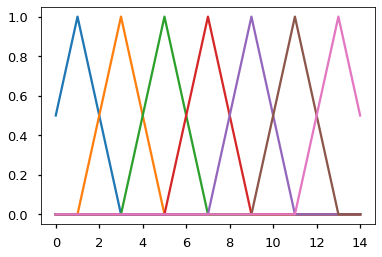

In [5]:
for i in range(7):
    plt.plot(P[:,i])